In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import netCDF4 as nc
from cartopy import crs
from cartopy.feature import NaturalEarthFeature
import wrf
from pathlib import Path

In [11]:
def get_plot_element(infile):
    rootgroup = nc.Dataset(infile, 'r')
    p = wrf.getvar(rootgroup, 'P')
    #lats, lons = wrf.latlon_coords(p)
    cart_proj = wrf.get_cartopy(p)
    xlim = wrf.cartopy_xlim(p)
    ylim = wrf.cartopy_ylim(p)
    rootgroup.close()
    return cart_proj, xlim, ylim

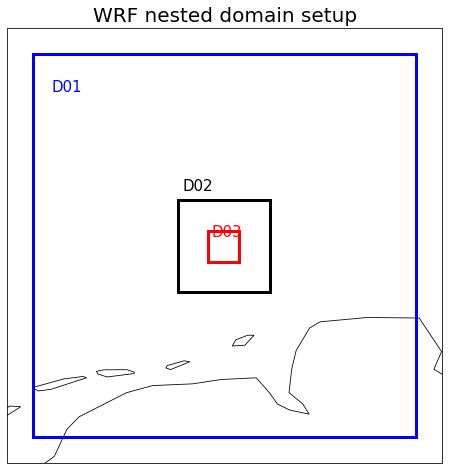

In [13]:
inpath=Path('/inf/run/daniel/MayCase/Nudging_3dom/out/')
 
infile_d01 = inpath/'wrfout_d01_2020-05-18_00:00:00'
cart_proj, xlim_d01, ylim_d01 = get_plot_element(infile_d01)
 
infile_d02 = inpath/'wrfout_d02_2020-05-18_00:00:00'
_, xlim_d02, ylim_d02 = get_plot_element(infile_d02)
 
infile_d03 = inpath/'wrfout_d03_2020-05-18_00:00:00'
_, xlim_d03, ylim_d03 = get_plot_element(infile_d03)
 
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=cart_proj)
 
states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                             name='admin_1_states_provinces_shp')
ax.add_feature(states, linewidth=0.5)
ax.coastlines('50m', linewidth=0.8)
 
# d01
ax.set_xlim([xlim_d01[0]-(xlim_d01[1]-xlim_d01[0])/15, xlim_d01[1]+(xlim_d01[1]-xlim_d01[0])/15])
ax.set_ylim([ylim_d01[0]-(ylim_d01[1]-ylim_d01[0])/15, ylim_d01[1]+(ylim_d01[1]-ylim_d01[0])/15])
 
# d01 box
ax.add_patch(mpl.patches.Rectangle((xlim_d01[0], ylim_d01[0]), xlim_d01[1]-xlim_d01[0], ylim_d01[1]-ylim_d01[0],
             fill=None, lw=3, edgecolor='blue', zorder=10))
ax.text(xlim_d01[0]+(xlim_d01[1]-xlim_d01[0])*0.05, ylim_d01[0]+(ylim_d01[1]-ylim_d01[0])*0.9, 'D01',
        size=15, color='blue', zorder=10)
 
# d02 box
ax.add_patch(mpl.patches.Rectangle((xlim_d02[0], ylim_d02[0]), xlim_d02[1]-xlim_d02[0], ylim_d02[1]-ylim_d02[0],
             fill=None, lw=3, edgecolor='black', zorder=10))
ax.text(xlim_d02[0]+(xlim_d02[1]-xlim_d02[0])*0.05, ylim_d02[0]+(ylim_d02[1]-ylim_d02[0])*1.1, 'D02',
        size=15, color='black', zorder=10)
 
# d03 box
ax.add_patch(mpl.patches.Rectangle((xlim_d03[0], ylim_d03[0]), xlim_d03[1]-xlim_d03[0], ylim_d03[1]-ylim_d03[0],
             fill=None, lw=3, edgecolor='red', zorder=10))
ax.text(xlim_d03[0]+(xlim_d03[1]-xlim_d03[0])*0.1, ylim_d03[0]+(ylim_d03[1]-ylim_d03[0])*0.8, 'D03',
        size=15, color='red', zorder=10)
 
ax.set_title('WRF nested domain setup', size=20)
 
plt.show()
#fig.savefig('WRF_domain_pywrf.big.png', dpi=600)